In [1]:
import os 
os.chdir("../")

In [21]:
import pandas as pd
import numpy as np
data = pd.read_csv('artifacts/data_ingestion/data_original.csv')

In [22]:
data.head()

,Unnamed: 0,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,date,time,year,month,day,hour
0,0,0,288.28,0.0,0.0,40,0,0,5545,2012-10-02,09:00:00,2012,10,2,9
1,1,0,289.36,0.0,0.0,75,0,1,4516,2012-10-02,10:00:00,2012,10,2,10
2,2,0,289.58,0.0,0.0,90,0,2,4767,2012-10-02,11:00:00,2012,10,2,11
3,3,0,290.13,0.0,0.0,90,0,2,5026,2012-10-02,12:00:00,2012,10,2,12
4,4,0,291.14,0.0,0.0,75,0,1,4918,2012-10-02,13:00:00,2012,10,2,13


In [ ]:
# Average traffic on holiday
# Average traffic by hour - done
# Average traffic by year


In [6]:
data.head()

,SNo,clouds_all,day,holiday,hour,month,rain_1h,snow_1h,temp,time,traffic_volume,weather_description,weather_main,year
date,,,,,,,,,,,,,,
2013-03-16,4317,90,16,0,6,3,0.0,0.0,272.63,6,1329,17,8,2013
2017-07-11,35262,20,11,0,19,7,0.0,0.0,302.08,19,3367,4,0,2017
2016-07-27,25269,90,27,0,2,7,0.0,0.0,296.32,2,341,2,0,2016
2017-12-03,39433,90,3,0,11,12,0.0,0.0,276.57,11,4113,2,0,2017
2013-02-05,3372,44,5,0,13,2,0.0,0.0,261.27,13,4811,0,0,2013


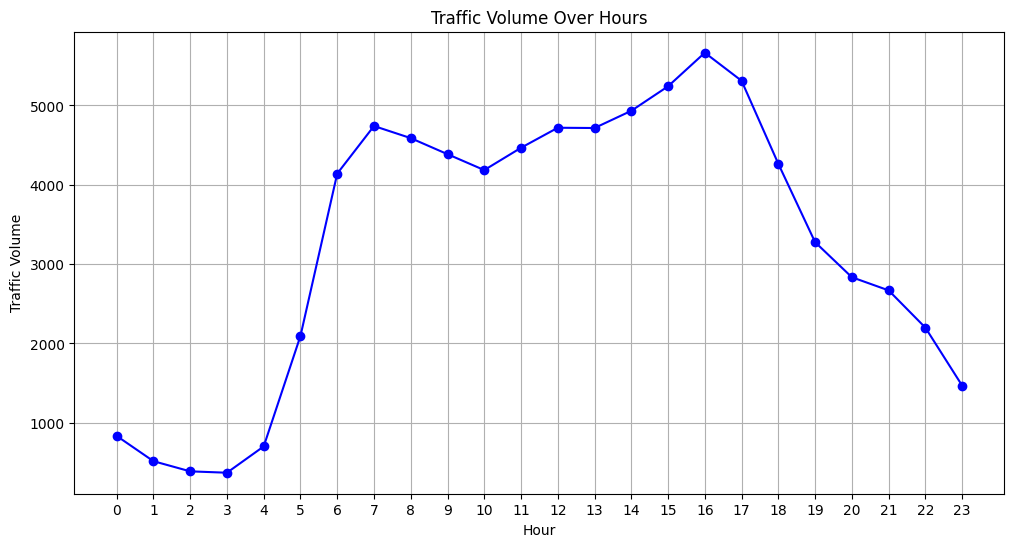

In [39]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Make sure 'date' column is in datetime format
# data['date'] = pd.to_datetime(data['date'])
# data['time'] = pd.to_datetime(data['time'], format='%H:%M:%S').dt.hour

# Set 'date' as the index
# data.set_index('date', inplace=True)

# Group by 'day' and 'hour' and calculate the mean traffic volume
traffic_by_hour = data.groupby('hour')['traffic_volume'].mean()

# Reshape the data for plotting
# traffic_by_day_hour = traffic_by_day_hour.unstack()

# Plot the time series
plt.figure(figsize=(12, 6))
traffic_by_hour.plot(marker='o', linestyle='-', color='b')
plt.title('Traffic Volume Over Hours')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.xticks(range(24))
plt.grid(True)
plt.savefig("hour_vs_traffic.png")
plt.show()

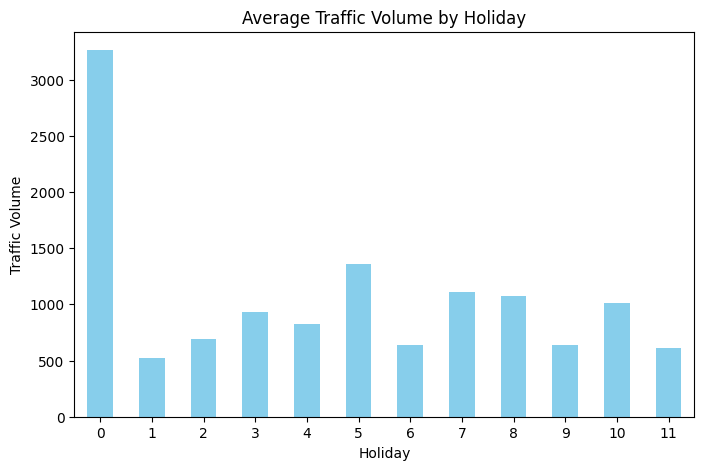

In [24]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Make sure 'date' column is in datetime format
# data['date'] = pd.to_datetime(data['date'])
# data['time'] = pd.to_datetime(data['time'], format='%H:%M:%S').dt.hour

# Set 'date' as the index
# data.set_index('date', inplace=True)

# Group by 'day' and 'hour' and calculate the mean traffic volume
traffic_by_holiday = data.groupby('holiday')['traffic_volume'].mean()

# Reshape the data for plotting
# traffic_by_day_hour = traffic_by_day_hour.unstack()

plt.figure(figsize=(8, 5))
traffic_by_holiday.plot(kind='bar', color='skyblue')
plt.title('Average Traffic Volume by Holiday')
plt.xlabel('Holiday')
plt.ylabel('Traffic Volume')
plt.xticks(rotation=0)
plt.show()

In [25]:
!pip install seaborn

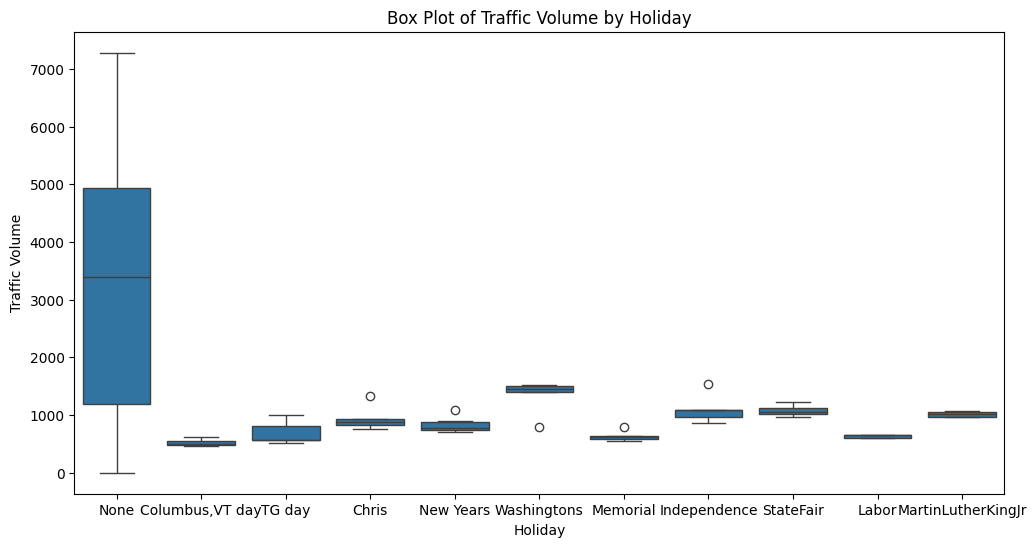

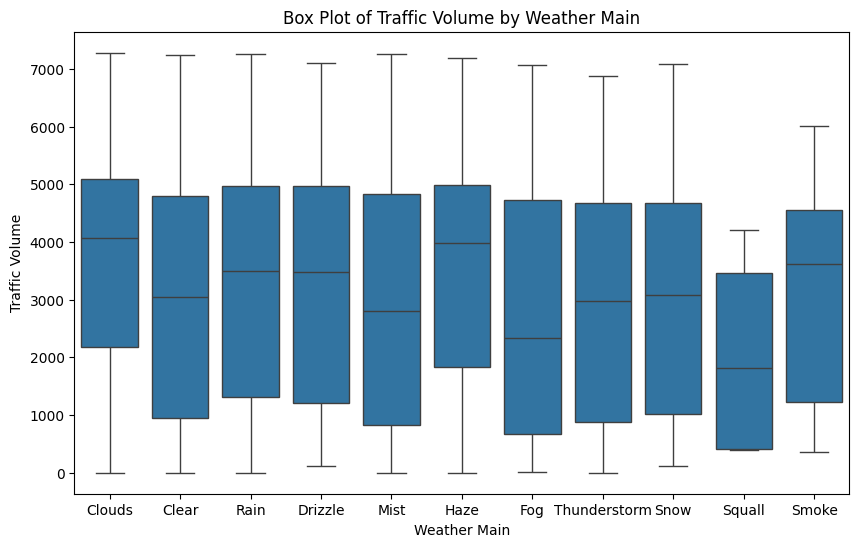

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
# 'holiday', 'weather_description', and 'weather_main' are categorical columns

# Box plot for 'holiday' vs 'traffic_volume'
holiday_mapping = {0: 'None',1:'Columbus,VT day',2:'TG day',3:'Chris',4:'New Years',5:'Washingtons',6:'Memorial',7:'Independence',8:'StateFair',9:'Labor',10:'MartinLutherKingJr'}
data['holiday_label'] = data['holiday'].map(holiday_mapping)
plt.figure(figsize=(12, 6))
sns.boxplot(x='holiday_label', y='traffic_volume', data=data)
plt.title('Box Plot of Traffic Volume by Holiday')
plt.xlabel('Holiday')
plt.ylabel('Traffic Volume')

plt.savefig('holiday.png')
plt.show()
# Box plot for 'weather_description' vs 'traffic_volume'
# plt.figure(figsize=(16, 8))
# sns.boxplot(x='weather_description', y='traffic_volume', data=data)
# plt.title('Box Plot of Traffic Volume by Weather Description')
# plt.xlabel('Weather Description')
# plt.ylabel('Traffic Volume')
# plt.xticks(rotation=45, ha='right')
# plt.show()

# Box plot for 'weather_main' vs 'traffic_volume'
# Clouds,Clear,Rain,Drizzle,Mist,Haze,Fog,Thunderstorm,Snow,Squall,Smoke
weather_main_mapping = {0: 'Clouds', 1: 'Clear', 2: 'Rain', 3: 'Drizzle', 4: 'Mist', 5: 'Haze', 6:'Fog',7:'Thunderstorm', 8:'Snow',9:'Squall',10:'Smoke'}
data['weather_label'] = data['weather_main'].map(weather_main_mapping)
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather_label', y='traffic_volume', data=data)
plt.title('Box Plot of Traffic Volume by Weather Main')
plt.xlabel('Weather Main')
plt.ylabel('Traffic Volume')

plt.savefig('weather.png')
plt.show()


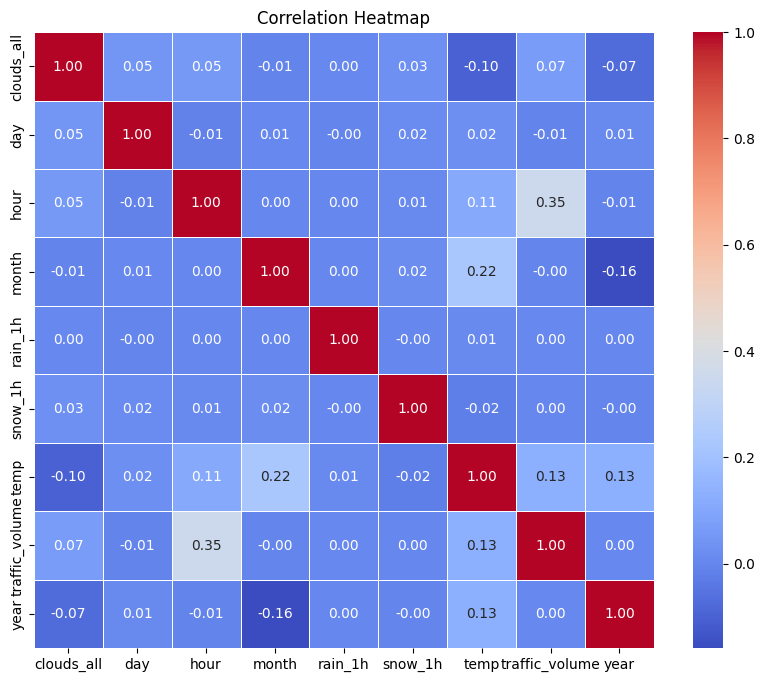

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
# Include only numerical columns for correlation analysis
numerical_columns = data[['clouds_all', 'day', 'hour', 'month', 'rain_1h', 'snow_1h', 'temp', 'traffic_volume', 'year']]

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')


plt.savefig('heatmap_plot.png', bbox_inches='tight')
plt.show()

